## Final Output ##

## Opening Dataset ##
### Clustering ###

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("train.csv")

df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


### Finding K-means ###

In [3]:
categorical_features = ['Name', 'Location', 'Year', 'Fuel_Type', 'Owner_Type', 'Transmission', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price']
continuous_features = ['Price', 'Kilometers_Driven']

In [4]:
df[categorical_features].describe()

,Year,Seats
count,5847.000000,5809.000000
mean,2013.448435,5.286452
std,3.194949,0.806668
min,1998.000000,2.000000
25%,2012.000000,5.000000
50%,2014.000000,5.000000
75%,2016.000000,5.000000
max,2019.000000,10.000000


In [5]:
for col in categorical_features:
    dummies = pd.get_dummies(df[col], prefix = col)
    df = pd.concat([df, dummies], axis= 1)
    df.drop(col, axis=1, inplace= True)
df.head()

,Unnamed: 0,Kilometers_Driven,Price,Name_Ambassador Classic Nova Diesel,Name_Audi A3 35 TDI Attraction,Name_Audi A3 35 TDI Premium,Name_Audi A3 35 TDI Premium Plus,Name_Audi A3 35 TDI Technology,Name_Audi A4 1.8 TFSI,Name_Audi A4 1.8 TFSI Technology Edition,...,New_Price_9.97 Lakh,New_Price_9.99 Lakh,New_Price_91.23 Lakh,New_Price_91.38 Lakh,New_Price_92.5 Lakh,New_Price_92.79 Lakh,New_Price_95.04 Lakh,New_Price_95.13 Lakh,New_Price_95.38 Lakh,New_Price_99.92 Lakh
0,1,41000,12.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,46000,4.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,87000,6.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,40670,17.74,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,86999,3.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)


In [7]:
sum_squared_dis = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    sum_squared_dis.append(km.inertia_)

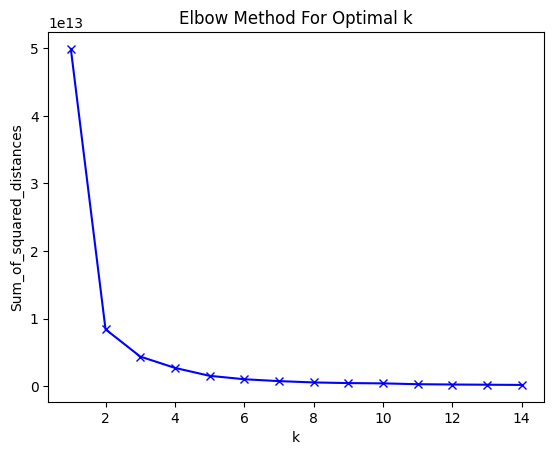

In [8]:
plt.plot(K, sum_squared_dis, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As you can see using the elbow method we will be using 3 as an Optimal K in this dataset

### Data Processing ###

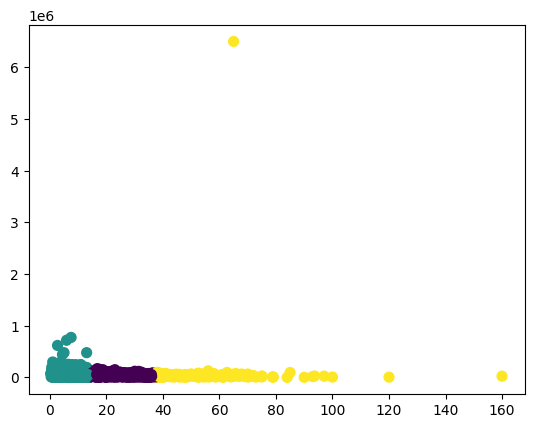

In [9]:
kmeans = KMeans(n_clusters=3, n_init = "auto")
kmeans.fit(df[['Price']])
df['Cluster'] = kmeans.labels_
plt.scatter(df['Price'], df['Kilometers_Driven'], c=df['Cluster'], s=50, cmap='viridis')
plt.show()

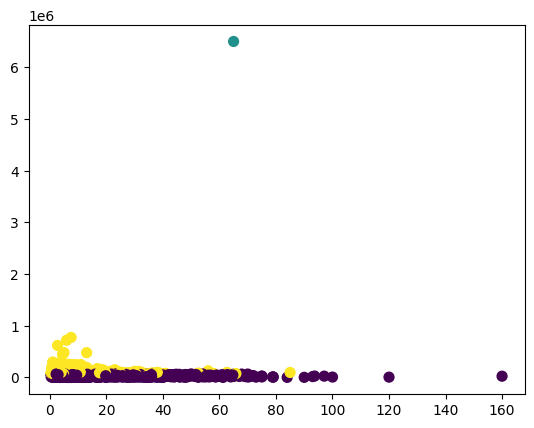

In [10]:
kmeans = KMeans(n_clusters=3, n_init = "auto")
kmeans.fit(df[['Kilometers_Driven']])
df['Cluster'] = kmeans.labels_
plt.scatter(df['Price'], df['Kilometers_Driven'], c=df['Cluster'], s=50, cmap='viridis')
plt.show()

## Association Rule Mining or ARM ##
### Opening Dataset ###

In [11]:
import numpy as np

In [12]:
df = pd.read_csv("Online Retail.csv")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


### Data PreProcessing ###

In [13]:
df.dropna(subset=['InvoiceNo', 'Description'], inplace=True)

basket = (df[df['Country'] == 'United Kingdom']
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
print(basket_sets.head())


Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536369                        0                         

In [16]:
average_quantity = df.groupby('Description')['Quantity'].mean().reset_index()

average_quantity = average_quantity.sort_values(by='Quantity', ascending=False)

print(average_quantity.head(10))


                              Description     Quantity
4114                  came coded as 20713  3100.000000
4133  did  a credit  and did not tick ret  1300.000000
3630                 TEA TIME TEA TOWELS   1300.000000
4214                  wrongly coded 23343  1000.000000
2247                      Marked as 23343   400.000000
4117                               check?   374.000000
275        ASSTD DESIGN 3D PAPER STICKERS   359.078947
3332     SET/5 RED SPOTTY LID GLASS BOWLS   288.000000
3441          SMALL CHINESE STYLE SCISSOR   246.814815
2196          MISELTOE HEART WREATH CREAM   240.000000


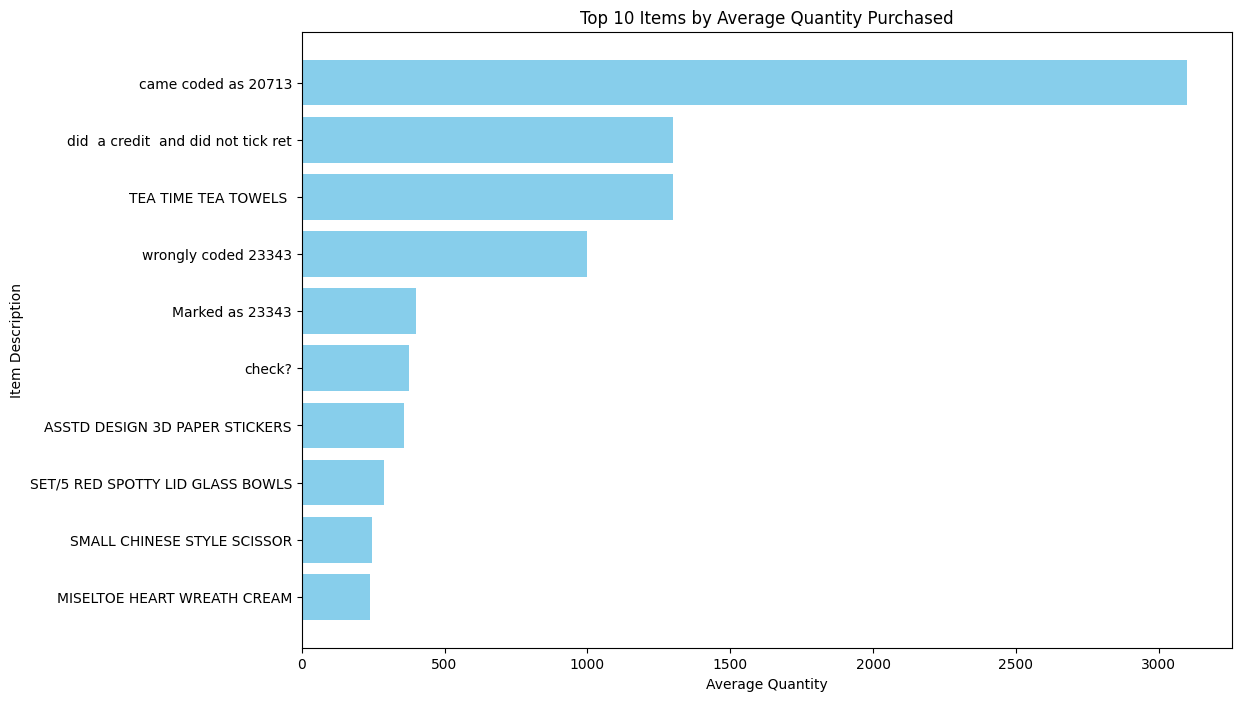

In [18]:
plt.figure(figsize=(12, 8))
plt.barh(average_quantity['Description'][:10][::-1], average_quantity['Quantity'][:10][::-1], color='skyblue')
plt.xlabel('Average Quantity')
plt.ylabel('Item Description')
plt.title('Top 10 Items by Average Quantity Purchased')
plt.show()


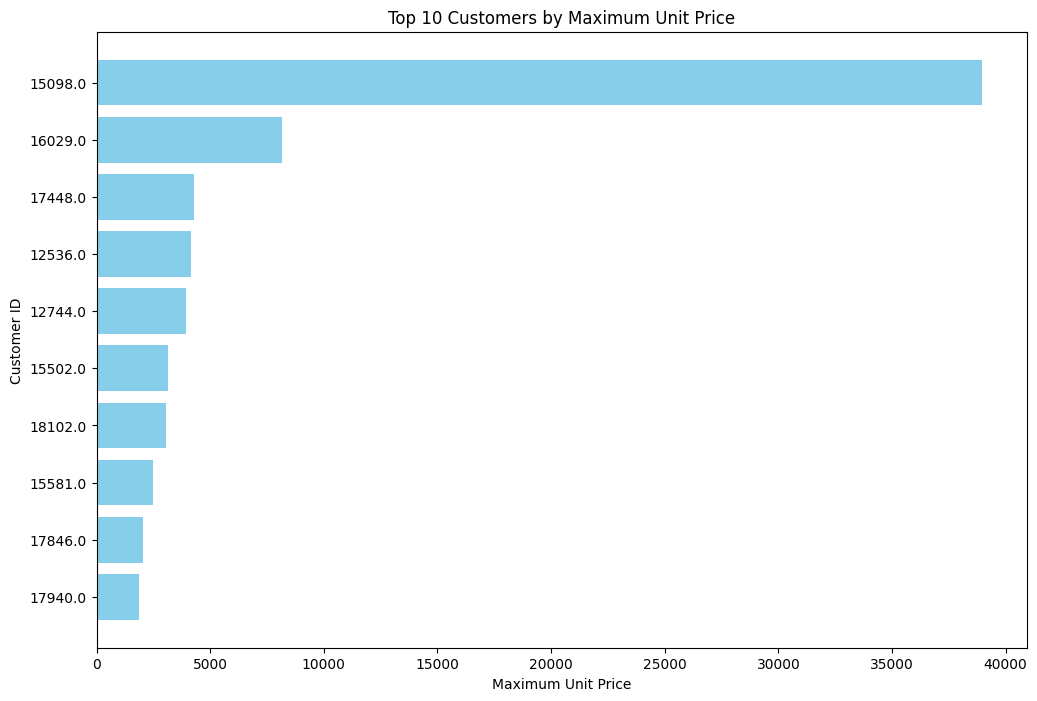

In [19]:
df.dropna(subset=['CustomerID', 'UnitPrice'], inplace=True)

max_unit_price = df.groupby('CustomerID')['UnitPrice'].max().reset_index()

max_unit_price = max_unit_price.sort_values(by='UnitPrice', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(max_unit_price['CustomerID'][:10].astype(str)[::-1], max_unit_price['UnitPrice'][:10][::-1], color='skyblue')
plt.xlabel('Maximum Unit Price')
plt.ylabel('Customer ID')
plt.title('Top 10 Customers by Maximum Unit Price')
plt.show()